In [1]:
# Importing essential libraries for data manipulation
import pandas as pd  
import numpy as np  

# Importing libraries for data visualization
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns  
sns.set_theme()  

# Importing libraries for data preprocessing and scaling
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  

# Importing libraries for various metric scores and analysis
from sklearn.metrics import (
    accuracy_score,  # Accuracy metric
    confusion_matrix,  # Confusion matrix metric
    precision_score,  # Precision metric
    recall_score,  # Recall metric
    f1_score,  # F1 score metric
    precision_recall_curve,  # Precision-Recall curve
    auc,  # Area Under the Curve metric
    roc_auc_score,  # ROC-AUC score metric
    roc_curve,  # ROC curve
)
from sklearn.decomposition import PCA  # Principal Component Analysis


import warnings  # Suppressing warnings for cleaner output
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  # or any {'0', '1', '2', '3'}


# Importing TensorFlow and Keras for neural network modeling
import tensorflow as tf  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout  
from tensorflow.keras import optimizers  
from tensorflow.keras.optimizers import Adam,RMSprop  
from scikeras.wrappers import KerasClassifier

import keras  
from keras import backend as K  
from keras.models import Sequential  
from keras.layers import Dense, Dropout, BatchNormalization  



In [2]:
df = pd.read_excel(r"churn.xlsx")

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
#checking the shape of the dataset
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#checking for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# checking for duplicate values
df.duplicated().sum()

0

In [8]:
# dropping `RowNumber`, `CustomerId`, and `Surname`
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [9]:
# Converting 'Gender' and 'Geography' columns to categorical
df[['Gender', 'Geography']] = df[['Gender', 'Geography']].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [12]:
df.describe(exclude="number").T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [13]:
def histogram_boxplot(data, feature, figsize=(10,6)):
    """
    Boxplot and histogram combined with KDE curve

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10, 6))
    """
    # Create subplots with shared x-axis
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Creating Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="green")

    # Creating Histogram with KDE curve
    sns.histplot(data=data, x=feature, color="green", kde=True, ax=ax_hist)

    # Adding mean and median lines to the histogram
    ax_hist.axvline(data[feature].mean(), color="red", linestyle="--", label="Mean")
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label="Median")

    ax_box.set(xlabel='')
    ax_hist.set_xlabel(feature)
    ax_hist.legend()

  
    plt.tight_layout()

  
    plt.show()

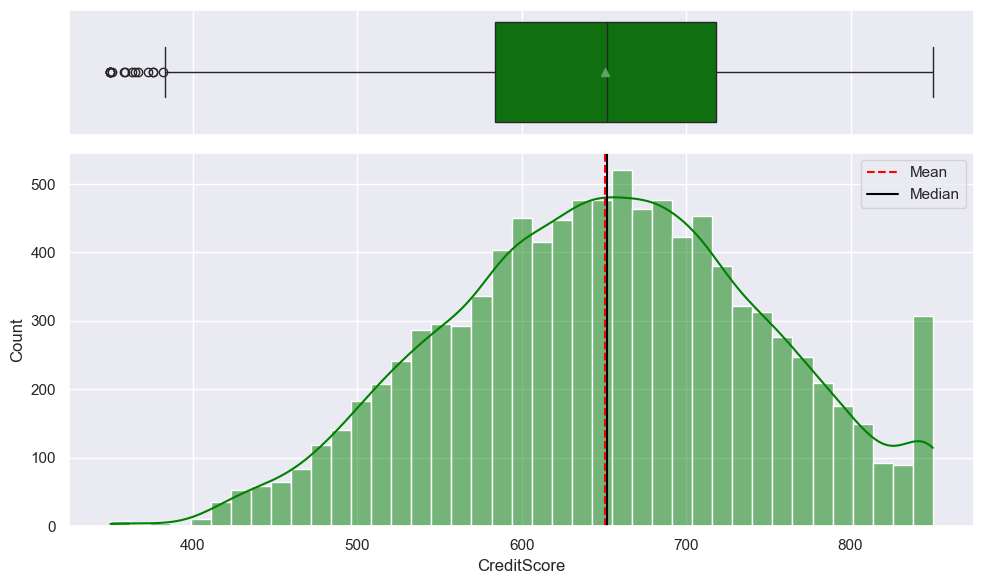

In [14]:
histogram_boxplot(df, "CreditScore")

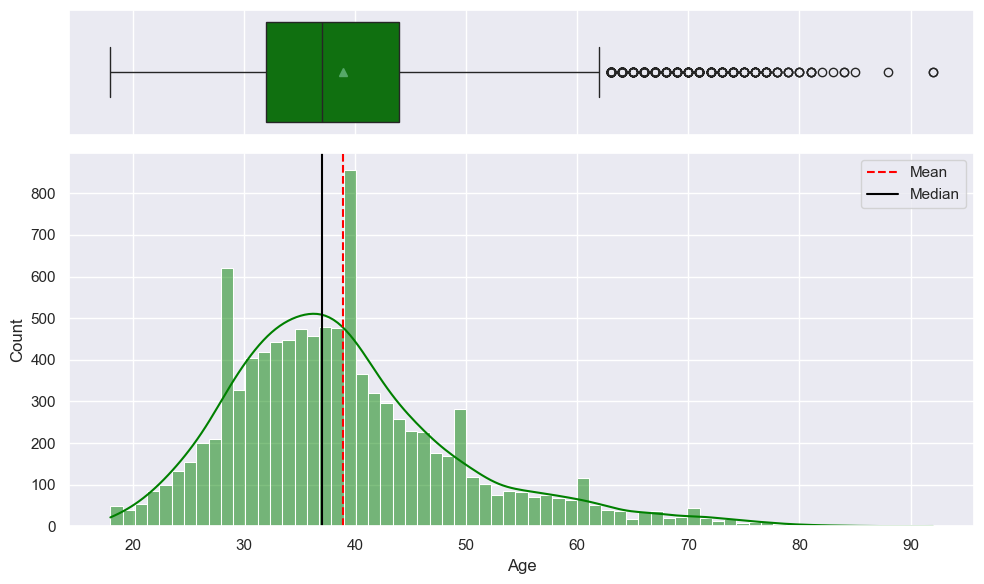

In [15]:
histogram_boxplot(df, "Age")

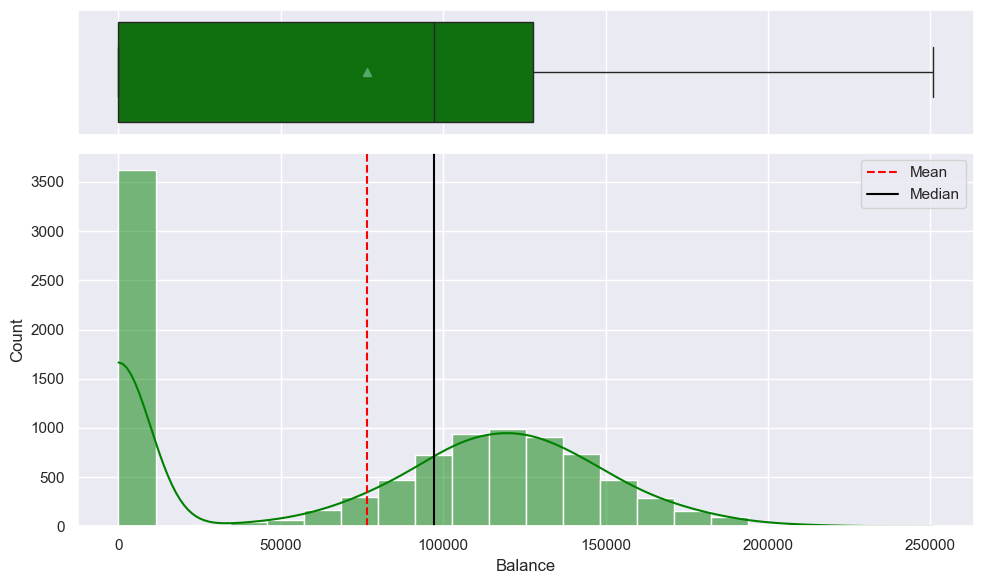

In [16]:
histogram_boxplot(df, "Balance")

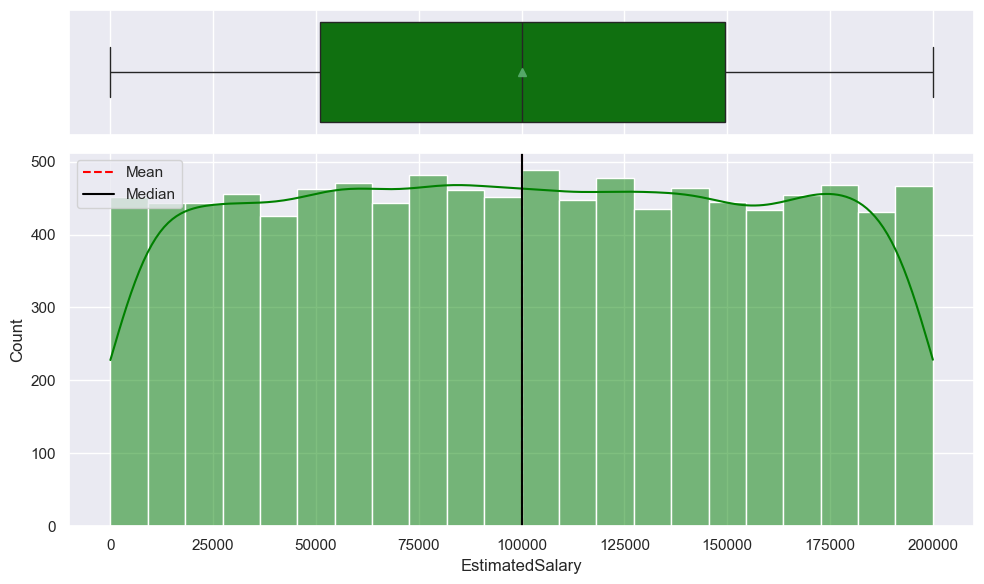

In [17]:
histogram_boxplot(df, "EstimatedSalary")

In [18]:
def categorical_barplot(data, categorical_column):
    """
    Function to generate a bar plot with percentage labels.

    Parameters:
    - data: DataFrame
    - categorical_column: Categorical column name
    """
    plt.figure(figsize=(6, 6))

    
    sns.countplot(x=categorical_column, data=data, palette='viridis')

  
    total_entries = len(data[categorical_column])
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format((p.get_height() / total_entries) * 100)
        x_position = p.get_x() + p.get_width() / 2 - 0.1
        y_position = p.get_height() + 0.05
        plt.text(x_position, y_position, percentage, ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Bar Plot of {categorical_column} with Percentage Labels')
    plt.show()



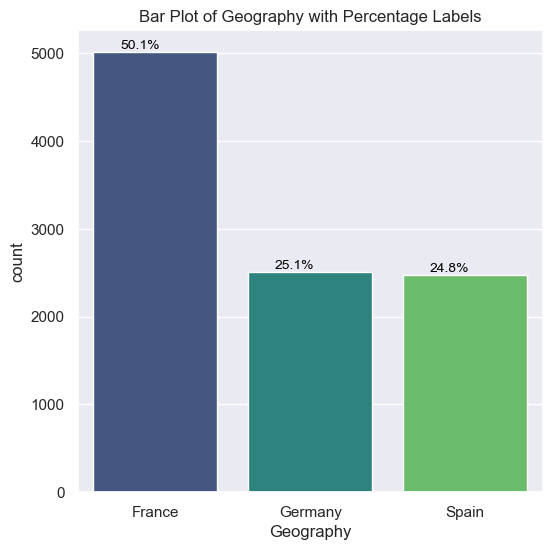

In [19]:
categorical_barplot(df, 'Geography')

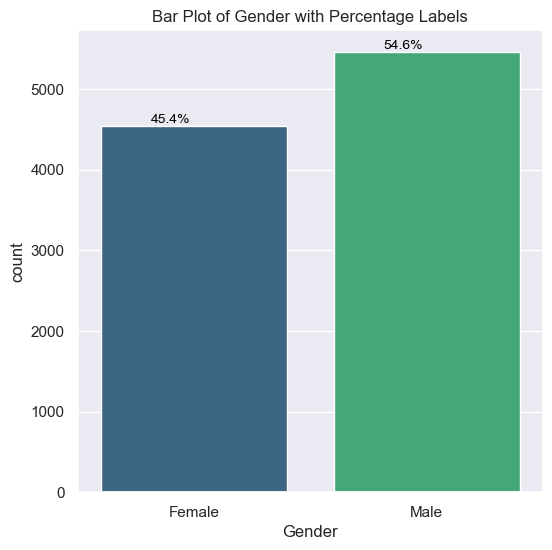

In [20]:
categorical_barplot(df, 'Gender')

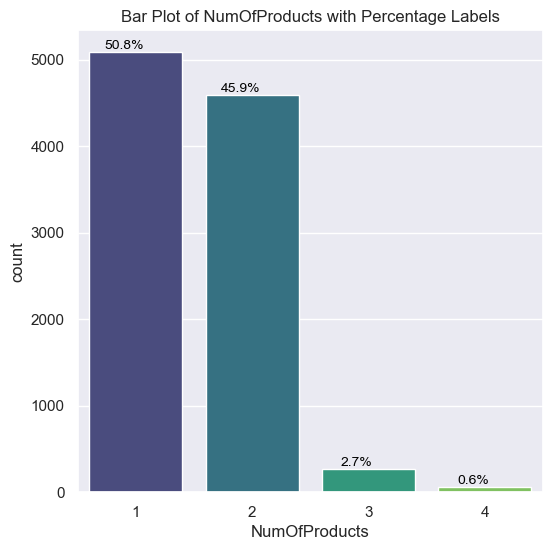

In [21]:
categorical_barplot(df, 'NumOfProducts')

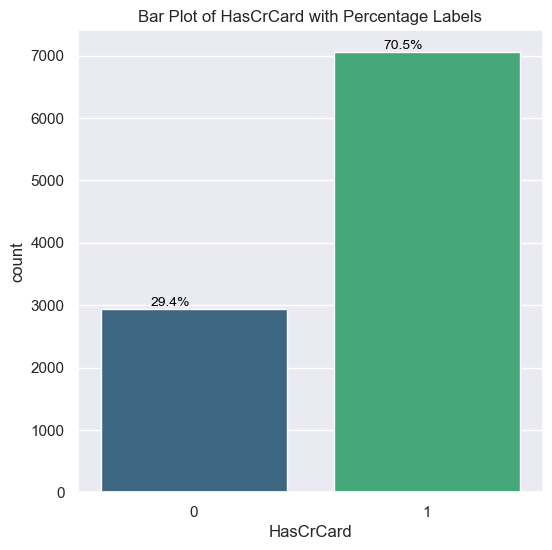

In [22]:
categorical_barplot(df, 'HasCrCard')

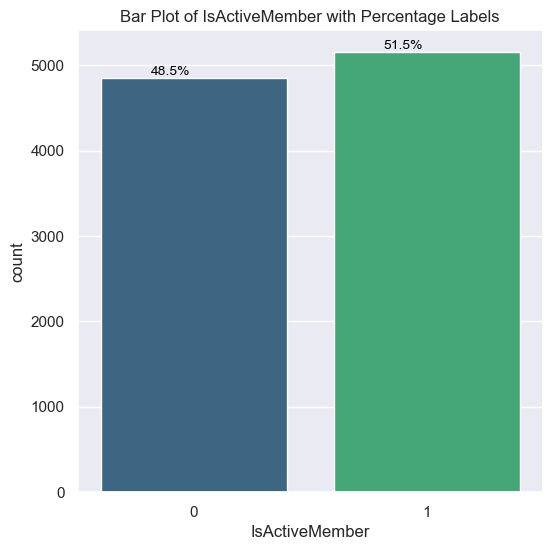

In [23]:
categorical_barplot(df, 'IsActiveMember')

In [24]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

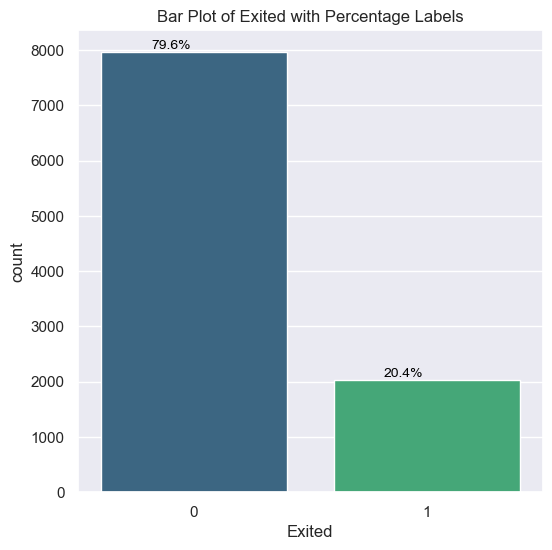

In [25]:
categorical_barplot(df, 'Exited')

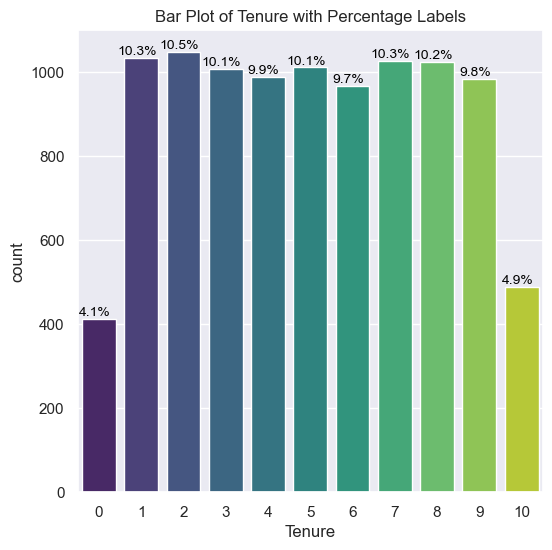

In [26]:
categorical_barplot(df,'Tenure')

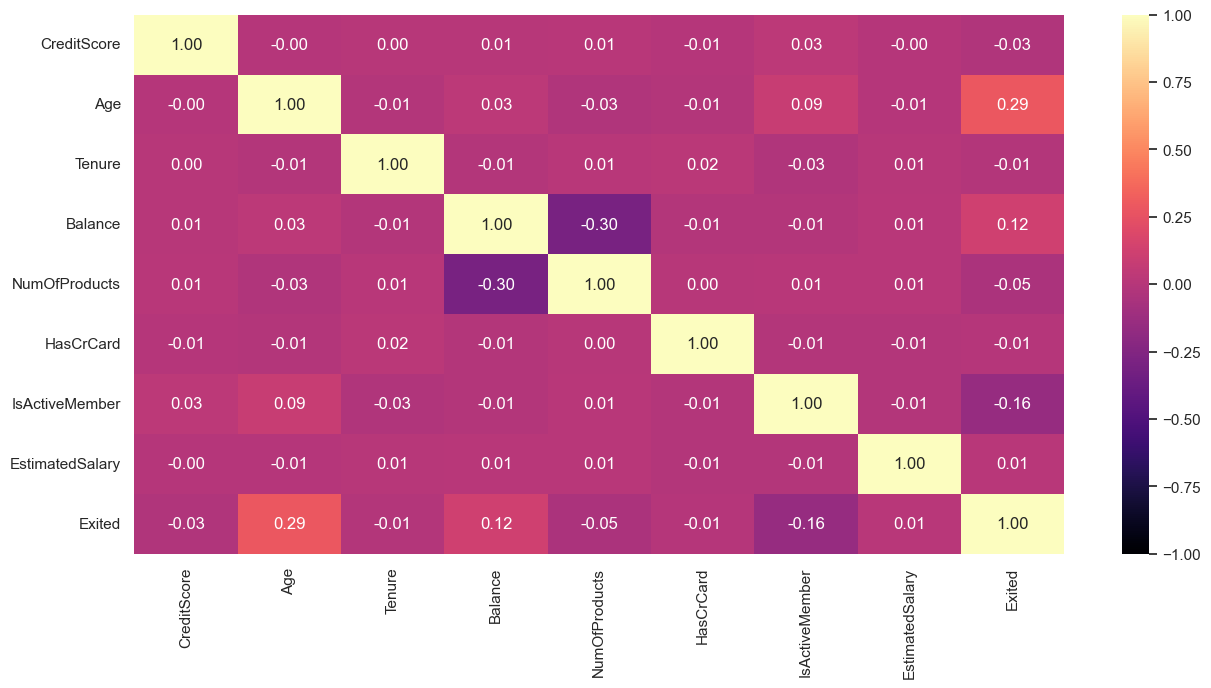

In [27]:
# checking for correlations
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="magma")
plt.show()

In [28]:
def bar_plot(data, x_col, hue_col, title):
    """
    Function to generate a bar plot for two categorical variables.

    Parameters:
    - data: DataFrame
    - x_col: Column name for the x-axis
    - hue_col: Column name for color differentiation (hue)
    - title: Title of the plot
    """
    plt.figure(figsize=(12, 8))  
    ax = sns.countplot(x=x_col, hue=hue_col, data=data, palette='viridis', edgecolor='white')
    
   
    total_entries = len(data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format((p.get_height() / total_entries) * 100)
        x_position = p.get_x() + p.get_width() / 2
        y_position = p.get_height() + 0.02  # Adjusted y_position to place labels above bars
        ax.annotate(percentage, (x_position, y_position), ha='center', va='bottom', fontsize=12, color='black')

   
    plt.xlabel(x_col.capitalize())
    plt.ylabel('Count')
    plt.title(title)
    plt.legend(title=hue_col.capitalize(), loc='upper right')

    
    plt.show()

In [29]:
def stacked_bar_plot(data, x_col, hue_col, title):
    """
    Function to generate a stacked bar plot for two categorical variables with percentage labels.

    Parameters:
    - data: DataFrame
    - x_col: Column name for the x-axis
    - hue_col: Column name for color differentiation (hue)
    - title: Title of the plot
    """
    
    cross_tab = pd.crosstab(data[x_col], data[hue_col], normalize='index')

    plt.figure(figsize=(12, 8))

    
    cross_tab.plot(kind='bar', stacked=True, color=['pink', 'coral'], edgecolor='white')

    # percentage labels
    for i in range(len(cross_tab)):
        total_entries = cross_tab.sum(axis=1).iloc[i]
        for j in range(len(cross_tab.columns)):
            percentage = '{:.1f}%'.format(cross_tab.iloc[i, j] * 100)
            x_position = i
            y_position = cross_tab.iloc[i, :j].sum() + cross_tab.iloc[i, j] / 2
            plt.text(x_position, y_position, percentage, ha='center', va='center', fontsize=10, color='black',rotation=90)

  
    plt.xlabel(x_col.capitalize())
    plt.ylabel('Count')
    plt.title(title)
    plt.legend(title=hue_col.capitalize(), loc='upper right')

   
    plt.show()

<Figure size 1200x800 with 0 Axes>

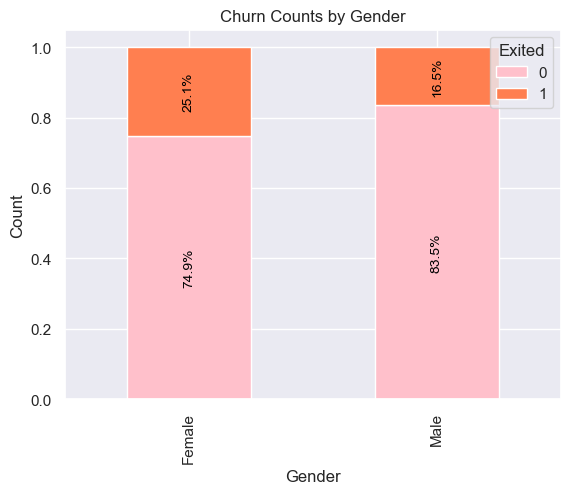

In [30]:
stacked_bar_plot(df, 'Gender', 'Exited', 'Churn Counts by Gender')

<Figure size 1200x800 with 0 Axes>

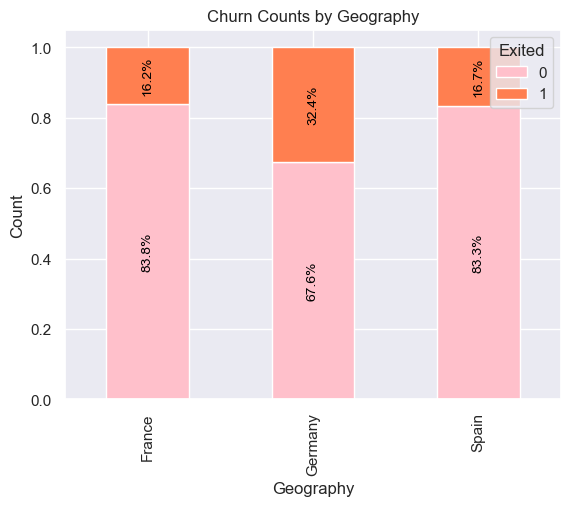

In [31]:
stacked_bar_plot(df, 'Geography', 'Exited', 'Churn Counts by Geography')

<Figure size 1200x800 with 0 Axes>

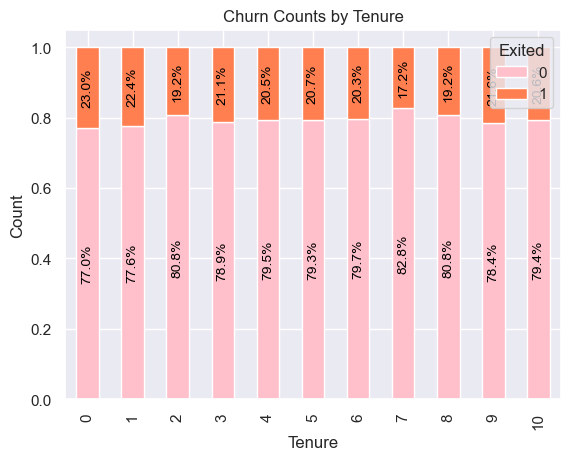

In [32]:
stacked_bar_plot(df, 'Tenure', 'Exited', 'Churn Counts by Tenure')

<Figure size 1200x800 with 0 Axes>

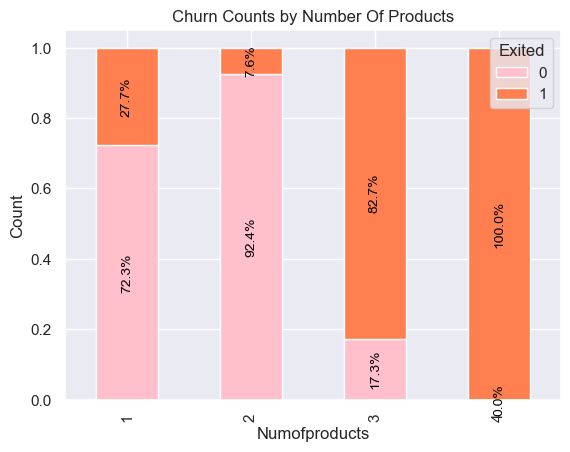

In [33]:
stacked_bar_plot(df, 'NumOfProducts', 'Exited', 'Churn Counts by Number Of Products')

<Figure size 1200x800 with 0 Axes>

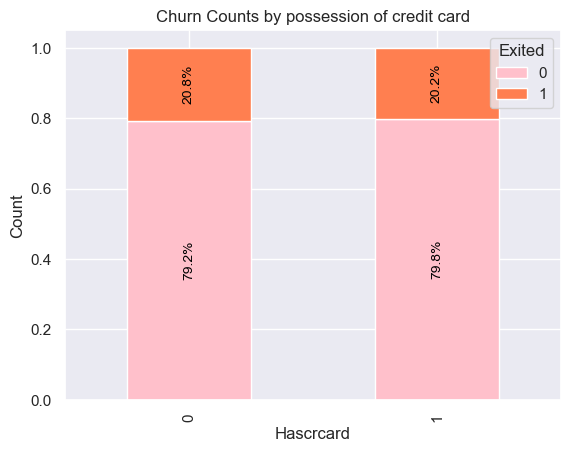

In [34]:
stacked_bar_plot(df, 'HasCrCard', 'Exited', 'Churn Counts by possession of credit card')

<Figure size 1200x800 with 0 Axes>

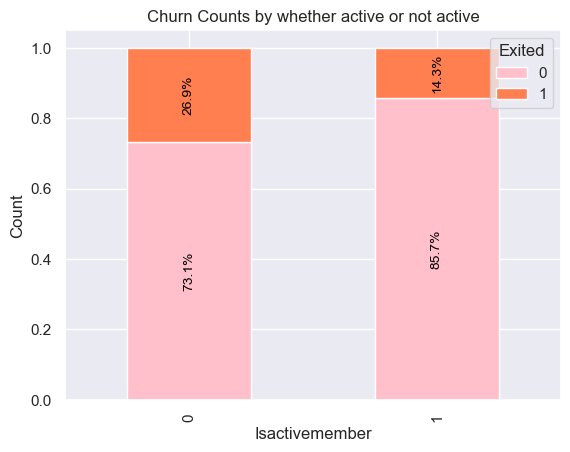

In [35]:
stacked_bar_plot(df, 'IsActiveMember', 'Exited', 'Churn Counts by whether active or not active')

In [36]:
data = df.copy()
# Splitting the Data
X_data = data.drop(["Exited"], axis=1)

# target variable
y_data = data["Exited"]  # target variable

# Creating dummy variables for the 2 the categorical variables
X_data = pd.get_dummies(X_data, columns=["Geography", "Gender"],drop_first=True)
X_data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
5,645,44,8,113755.78,2,1,0,149756.71,False,True,True
6,822,50,7,0.00,2,1,1,10062.80,False,False,True
7,376,29,4,115046.74,4,1,0,119346.88,True,False,False
8,501,44,4,142051.07,2,0,1,74940.50,False,False,True
9,684,27,2,134603.88,1,1,1,71725.73,False,False,True


In [37]:
X_data.shape

(10000, 11)

In [38]:
# Splitting the data up in train, validation and test sets


X_temp, X_test, y_temp, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1, stratify=y_data)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp)

In [39]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6400, 11)
Shape of X_val: (1600, 11)
Shape of X_test: (2000, 11)
Shape of y_train: (6400,)
Shape of y_val: (1600,)
Shape of y_test: (2000,)


In [40]:
# Specifying columns to scale
columns_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

# Create a scaler
scaler = StandardScaler()

# Fiting on the training set
scaler.fit(X_train[columns_to_scale])

# Transforming the training set
X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])

# Transforming the validation and test sets
X_val[columns_to_scale] = scaler.transform(X_val[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [41]:
X_train.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5292,0.976155,-1.047381,0.347046,-1.212523,2,1,0,0.939366,False,False,False
3879,1.316949,-0.572048,1.377238,1.214872,2,0,0,1.389376,False,False,False
6118,-0.190810,0.949016,0.003649,1.473810,1,0,0,0.692477,False,False,False
4044,0.077695,-0.667115,1.033841,-1.212523,1,1,1,-0.347954,False,False,True
3202,-0.893054,-0.572048,-0.339749,0.961751,1,1,0,-0.647963,False,False,False
6142,1.079426,-0.096715,-1.369941,-1.212523,2,1,0,-1.386390,False,False,False
7804,0.346200,1.899682,1.377238,0.746234,1,0,1,-1.472138,True,False,True
9731,-0.448988,-0.952314,0.690443,0.428567,1,1,0,1.093685,True,False,True
9086,-0.035903,-0.952314,-1.026544,-1.212523,2,1,0,1.368194,False,True,False
2539,-0.686511,0.663817,0.347046,0.184697,2,1,0,0.347509,True,False,False


In [42]:
# initializing the model
model = Sequential()

#input layer
model.add(Dense(units=32, activation='relu', input_dim=11))

#hidden layer
model.add(Dense(units=64, activation='relu'))

#output layer
model.add(Dense(1, activation='sigmoid'))



In [43]:
# Creating the model with SGD optimizer with default learning rate and recall as the metric
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [45]:
X_train = X_train.astype(int)
X_val = X_val.astype(int)
X_test = X_test.astype(int)

y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

In [46]:
history = model.fit(X_train, y_train, epochs=50,validation_data=(X_val, y_val), batch_size=32)

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.5385 - recall: 0.0422 - val_loss: 0.4915 - val_recall: 0.0000e+00
Epoch 2/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4892 - recall: 0.0000e+00 - val_loss: 0.4808 - val_recall: 0.0000e+00
Epoch 3/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4801 - recall: 0.0000e+00 - val_loss: 0.4732 - val_recall: 0.0000e+00
Epoch 4/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4730 - recall: 7.6687e-04 - val_loss: 0.4668 - val_recall: 0.0000e+00
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4673 - recall: 0.0023 - val_loss: 0.4614 - val_recall: 0.0000e+00
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4627 - recall: 0.0077 - val_loss: 0.4570 - val_recall: 0.0123
Epoch 7/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4592 - recall: 0.0215 - val_loss: 0.4536 - val_recall: 0.0307
Ep

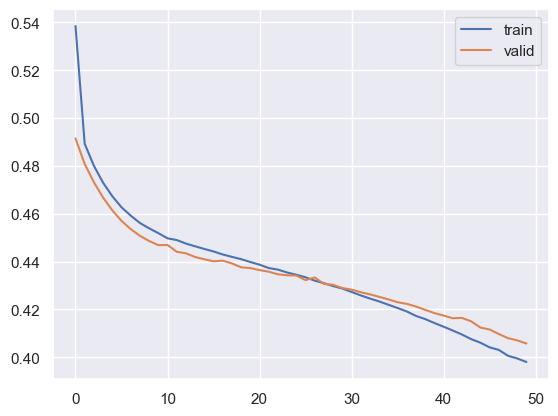

In [47]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

200/200 [==============================] - 0s 623us/step


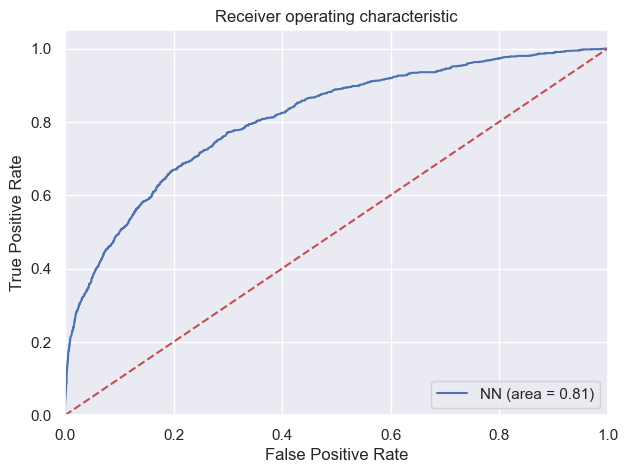

In [48]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train.astype(float), model.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 [==============================] - 0s 673us/step


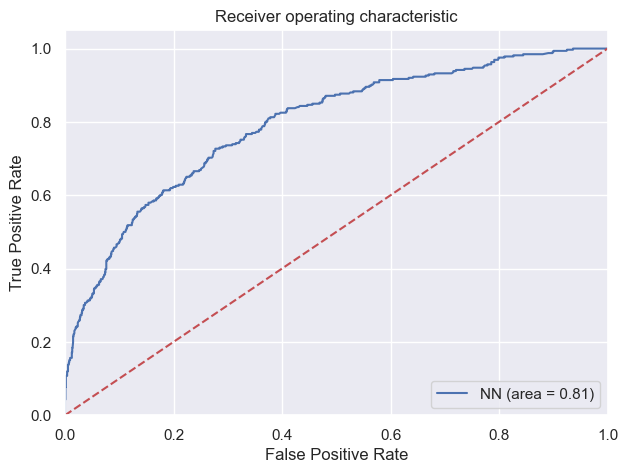

In [49]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()


In [50]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

200/200 [==============================] - 0s 648us/step
0.19406302


In [51]:
def make_confusion_matrix(
    cf,
    group_names=None,
    categories="auto",
    count=True,
    percent=True,
    cbar=True,
    xyticks=True,
    xyplotlabels=True,
    sum_stats=True,
    figsize=None,
    cmap="Blues",
    title=None,
):
    """
    This function will make a pretty plot of an sklearn Confusion Matrix cf using a Seaborn heatmap visualization.
    
    """

    blanks = ["" for _ in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = [
            "{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)
        ]
    else:
        group_percentages = blanks

    box_labels = [
        f"{v1}{v2}{v3}".strip()
        for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)
    ]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score
            )
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
            
            
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize is None:
        # Get default figure size if not set
        figsize = plt.rcParams.get("figure.figsize")

    if not xyticks:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(
        cf,
        annot=box_labels,
        fmt="",
        cmap=cmap,
        cbar=cbar,
        xticklabels=categories,
        yticklabels=categories,
    )

    if xyplotlabels:
        plt.ylabel("True label")
        plt.xlabel("Predicted label" + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)
        
    # Creating a DataFrame for metrics
    
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy, precision, recall, f1_score]
    })

    return metrics_df.T    

50/50 [==============================] - 0s 816us/step


,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Score,0.718125,0.396007,0.730061,0.513484


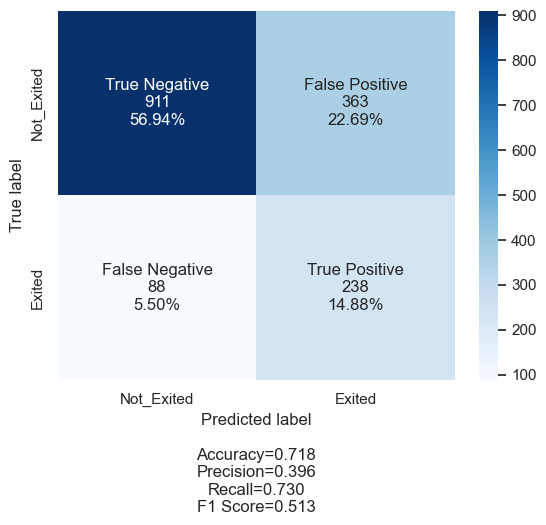

In [52]:
# Predictions on validation set
y_pred_val = model.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

In [53]:
model1 = Sequential()

# Adding the input layer 
model1.add(Dense(units=32, activation='relu', input_dim=11))

#Adding the hidden layer
model1.add(Dense(units=16, activation="relu"))

# Adding the output layer
model1.add(Dense(1, activation='sigmoid'))

In [54]:
# Compiling the model

model1.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

In [55]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                384       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [56]:
history1 = model1.fit(X_train, y_train, epochs=50,validation_data=(X_val, y_val), batch_size=32)

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.5078 - recall_1: 0.0077 - val_loss: 0.4600 - val_recall_1: 0.0031
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4536 - recall_1: 0.0261 - val_loss: 0.4434 - val_recall_1: 0.1135
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4428 - recall_1: 0.0913 - val_loss: 0.4339 - val_recall_1: 0.1687
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4336 - recall_1: 0.1641 - val_loss: 0.4242 - val_recall_1: 0.1350
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4225 - recall_1: 0.1771 - val_loss: 0.4164 - val_recall_1: 0.1933
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4125 - recall_1: 0.2094 - val_loss: 0.4063 - val_recall_1: 0.2055
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3990 - recall_1: 0.2508 - val_loss: 0.4059 - val_recall_1: 0.1779
Epoch 

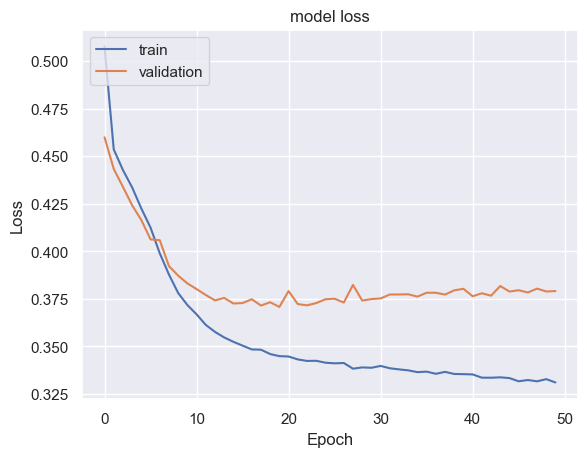

In [57]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [58]:
#Training the model to early stop

model_e = Sequential()
model_e.add(Dense(units=32, activation='relu', input_dim=11))
model_e.add(Dense(units=16, activation='relu'))
model_e.add(Dense(units=1, activation='sigmoid'))


# Compile the model
model_e.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

In [59]:
#Importing classback API
from keras import callbacks


# Define early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Train the model with early stopping
history_e = model_e.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    batch_size=32, callbacks=[early_stopping], verbose=1)

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.5042 - recall_2: 0.0314 - val_loss: 0.4563 - val_recall_2: 0.0399
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4505 - recall_2: 0.1005 - val_loss: 0.4391 - val_recall_2: 0.1227
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4373 - recall_2: 0.1480 - val_loss: 0.4295 - val_recall_2: 0.1227
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4235 - recall_2: 0.1856 - val_loss: 0.4200 - val_recall_2: 0.1933
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4112 - recall_2: 0.2331 - val_loss: 0.4087 - val_recall_2: 0.2055
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4002 - recall_2: 0.2554 - val_loss: 0.4008 - val_recall_2: 0.3282
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3909 - recall_2: 0.2991 - val_loss: 0.3934 - val_recall_2: 0.2822
Epoch 

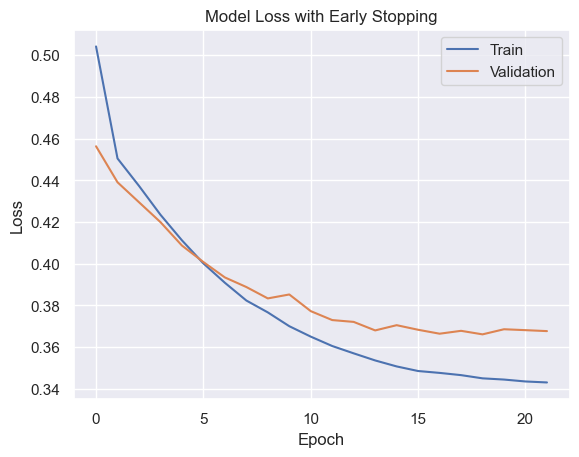

In [60]:
# Plot training loss and validation loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('Model Loss with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

200/200 [==============================] - 0s 628us/step


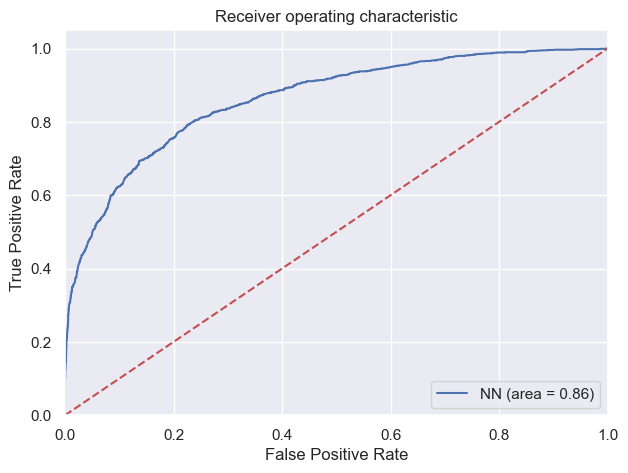

In [61]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train.astype(float), model_e.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model_e.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 [==============================] - 0s 653us/step


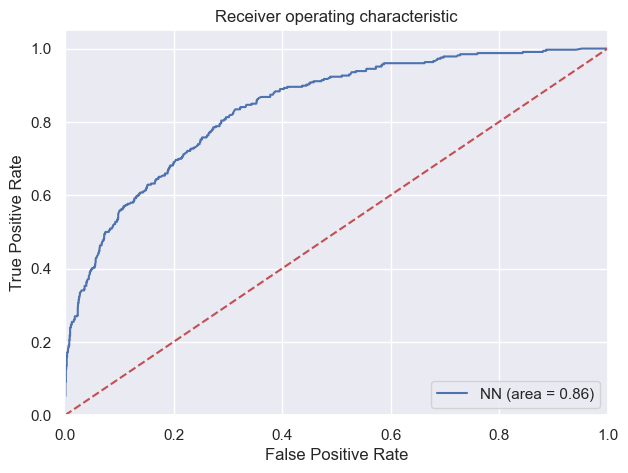

In [62]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model_e.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model_e.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [63]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model_e.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

200/200 [==============================] - 0s 668us/step
0.21065849


50/50 [==============================] - 0s 604us/step


,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Score,0.75875,0.44382,0.726994,0.551163


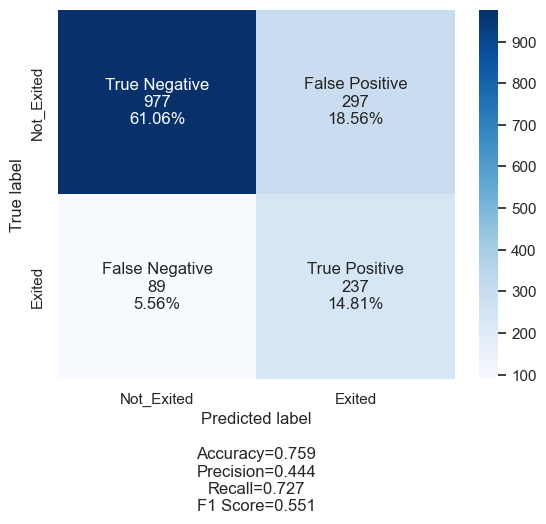

In [64]:
# Predictions on validation set
y_pred_val = model_e.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

In [65]:
#Initializing the neural network
model2 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model2.add(Dense(32,activation='relu',input_dim = 11))

# Adding dropout with ratio of 0.2
model2.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model2.add(Dense(16,activation='relu'))

# Adding dropout with ratio of 0.2
model2.add(Dropout(0.2))
# Adding the second hidden layer with 8 neurons with relu as activation functions
#model2.add(Dense(8,activation='relu'))

# Adding the output layer
model2.add(Dense(1, activation = 'sigmoid'))

In [66]:
model2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

In [67]:
# Summary of the model
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [68]:
history2 = model2.fit(X_train,y_train,batch_size=32,epochs=50,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.5236 - recall_3: 0.0552 - val_loss: 0.4608 - val_recall_3: 0.0031
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4751 - recall_3: 0.0767 - val_loss: 0.4475 - val_recall_3: 0.0368
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4644 - recall_3: 0.1166 - val_loss: 0.4403 - val_recall_3: 0.1012
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4567 - recall_3: 0.1434 - val_loss: 0.4349 - val_recall_3: 0.0644
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4504 - recall_3: 0.1679 - val_loss: 0.4307 - val_recall_3: 0.0859
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4380 - recall_3: 0.2017 - val_loss: 0.4212 - val_recall_3: 0.1595
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4363 - recall_3: 0.2002 - val_loss: 0.4130 - val_recall_3: 0.2362
Epoch 

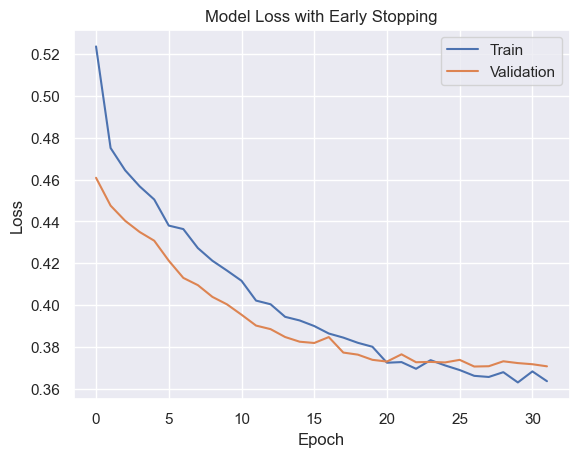

In [69]:
# Plot training loss and validation loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

200/200 [==============================] - 0s 638us/step


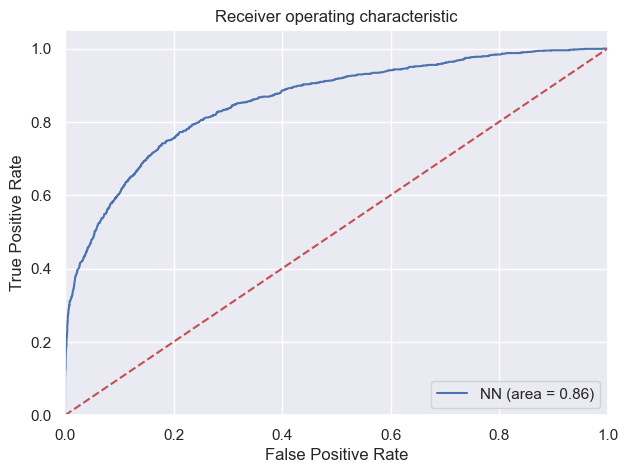

In [70]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train.astype(float), model2.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model2.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 [==============================] - 0s 755us/step


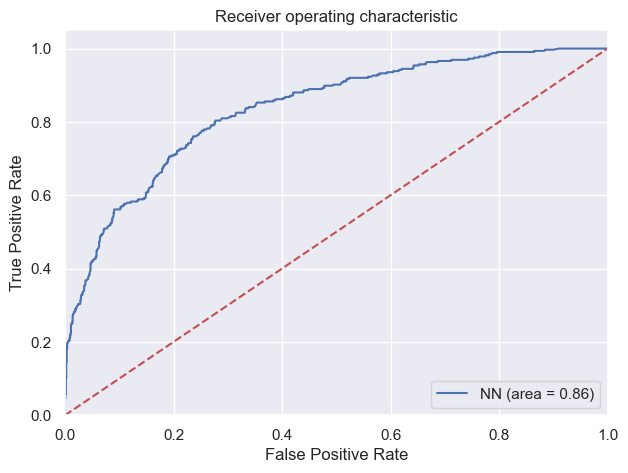

In [71]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model2.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model2.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [72]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model2.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

200/200 [==============================] - 0s 709us/step
0.19585633


50/50 [==============================] - 0s 838us/step


,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Score,0.786875,0.484009,0.696319,0.571069


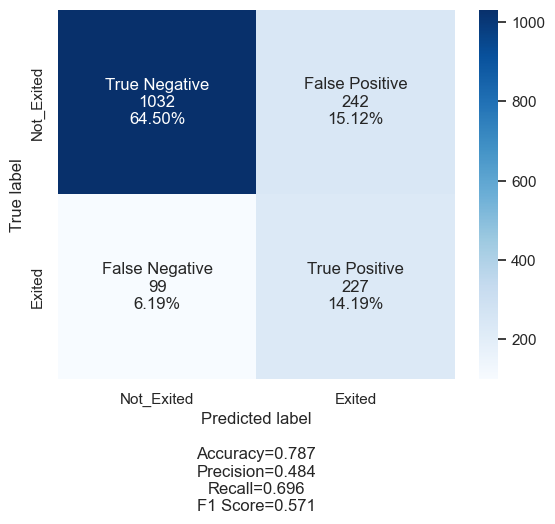

In [73]:
# Predictions on validation set
y_pred_val = model2.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

In [74]:
def create_model(layer_1=32, layer_2=16, lr=0.001, dropout_rate1=0.0, dropout_rate2=0.0):
    # Initializing the neural network
    model_3 = Sequential()
    
    # Adding the input layer (by specifying input dimension)
    model_3.add(Dense(layer_1, activation='relu', input_dim=X_train.shape[1]))
    # Adding dropout before the hidden layer
    model_3.add(Dropout(dropout_rate1))

    # Adding the hidden layer
    model_3.add(Dense(layer_2, activation='relu'))
    # Adding dropout after the hidden layer
    model_3.add(Dropout(dropout_rate2))

    # Adding the output layer
    # We have an output of 1 node, which is the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model_3.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    
    # Compile model
    model_3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])
    
    return model_3

In [75]:
keras_estimator = KerasClassifier(build_fn=create_model, verbose=1,dropout_rate1=0.0,dropout_rate2=0.0,lr=0.001)

In [78]:
from sklearn.model_selection import GridSearchCV
# Define the grid search parameters
param_grid = {
    'batch_size': [32, 64, 128],
    'lr': [0.01, 0.001, 0.1],
    'dropout_rate1': [0.0, 0.1, 0.2],
    'dropout_rate2': [0.0, 0.1, 0.2]
}

kfold_splits = 3

# Applying GridSearchCV
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,
                    n_jobs=1)

In [79]:
## Fitting Grid model
grid_result = grid.fit(X_train, y_train,validation_data = (X_val,y_val),verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean 
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 81 candidates, totalling 243 fits
100/100 [==============================] - 0s 2ms/step - loss: 0.4631 - recall_247: 0.1212 - val_loss: 0.4272 - val_recall_247: 0.1196
Best: 0.810782 using {'batch_size': 64, 'dropout_rate1': 0.0, 'dropout_rate2': 0.0, 'lr': 0.01}


In [80]:
# Creating the model
model3=create_model(lr=grid_result.best_params_['lr'])
# Printing model summary
model3.summary()

Model: "sequential_248"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_744 (Dense)           (None, 32)                384       
                                                                 
 dropout_490 (Dropout)       (None, 32)                0         
                                                                 
 dense_745 (Dense)           (None, 16)                528       
                                                                 
 dropout_491 (Dropout)       (None, 16)                0         
                                                                 
 dense_746 (Dense)           (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Fitting the model
history3= model3.fit(X_train, y_train, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4574 - recall_248: 0.1028 - val_loss: 0.4225 - val_recall_248: 0.1227
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4181 - recall_248: 0.2178 - val_loss: 0.4154 - val_recall_248: 0.3773
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3963 - recall_248: 0.3167 - val_loss: 0.3998 - val_recall_248: 0.2883
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3770 - recall_248: 0.3620 - val_loss: 0.3861 - val_recall_248: 0.2914
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3694 - recall_248: 0.3781 - val_loss: 0.3789 - val_recall_248: 0.3896
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3577 - recall_248: 0.4080 - val_loss: 0.3720 - val_recall_248: 0.4110
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3538 - recall_248: 0.4294 - val_loss: 0.3738 - v

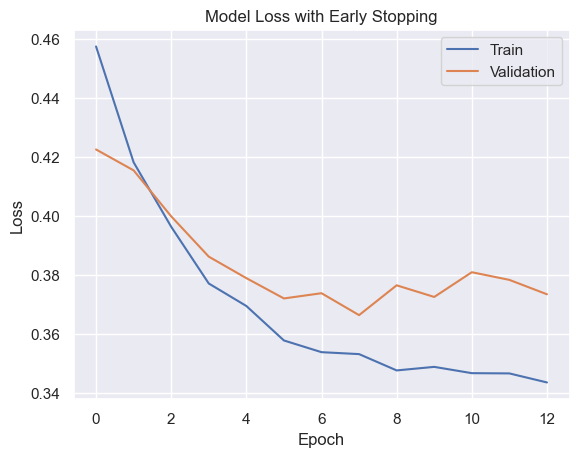

In [82]:
# Plot training loss and validation loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

200/200 [==============================] - 0s 851us/step


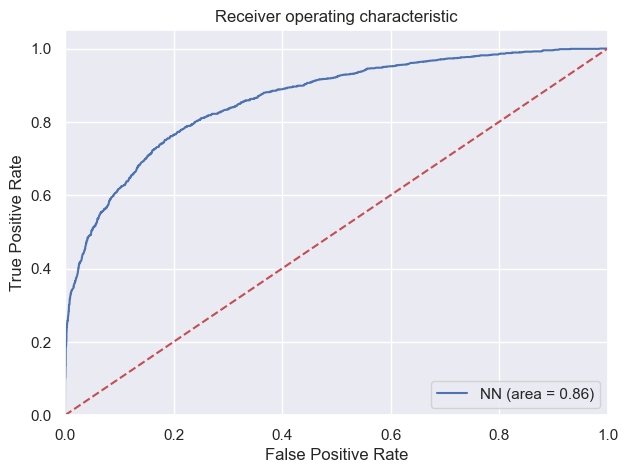

In [83]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train.astype(float), model3.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model3.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 [==============================] - 0s 1ms/step


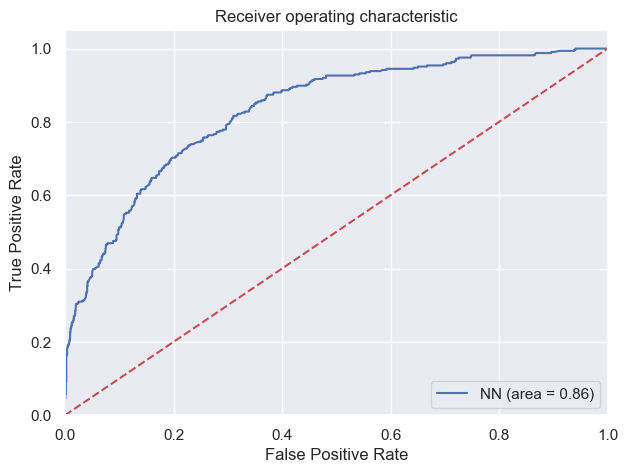

In [84]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model3.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model3.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [85]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model3.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

200/200 [==============================] - 0s 1ms/step
0.23336995


50/50 [==============================] - 0s 1ms/step


,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Score,0.7875,0.484783,0.684049,0.56743


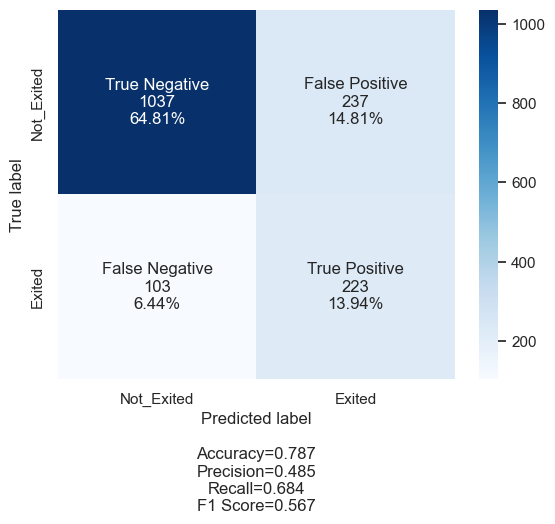

In [88]:
# Predictions on validation set
y_pred_val = model3.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

In [89]:
from imblearn.over_sampling import SMOTE
sm  = SMOTE(random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train) 
print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

After OverSampling, the shape of train_X: (10192, 11)
After OverSampling, the shape of train_y: (10192,) 



In [90]:
Oversampled_count = y_train_over.value_counts()
Oversampled_count

Exited
0    5096
1    5096
Name: count, dtype: int64

In [91]:
#Initializing the neural network
model4 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model4.add(Dense(32,activation='relu',input_dim = 11))

# Adding dropout with ratio of 0.2
model4.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model4.add(Dense(16,activation='relu'))

# Adding dropout with ratio of 0.2
model4.add(Dropout(0.2))

# Adding the second hidden layer with 8 neurons with relu as activation functions
#model2.add(Dense(8,activation='relu'))

# Adding the output layer
model4.add(Dense(1, activation = 'sigmoid'))

In [92]:
model4.summary()

Model: "sequential_249"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_747 (Dense)           (None, 32)                384       
                                                                 
 dropout_492 (Dropout)       (None, 32)                0         
                                                                 
 dense_748 (Dense)           (None, 16)                528       
                                                                 
 dropout_493 (Dropout)       (None, 16)                0         
                                                                 
 dense_749 (Dense)           (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [93]:
# Complining the model with binary cross entropy as loss and recall. as metrics
model4.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

# Fitting the model on train and test with batch_size of 32, and early stopping
history4 = model4.fit(X_train_over,y_train_over,batch_size=32,epochs=50,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/50
319/319 [==============================] - 1s 3ms/step - loss: 0.6458 - recall_249: 0.5498 - val_loss: 0.5706 - val_recall_249: 0.6104
Epoch 2/50
319/319 [==============================] - 1s 2ms/step - loss: 0.6027 - recall_249: 0.6772 - val_loss: 0.5782 - val_recall_249: 0.6902
Epoch 3/50
319/319 [==============================] - 1s 2ms/step - loss: 0.5732 - recall_249: 0.7231 - val_loss: 0.5389 - val_recall_249: 0.6319
Epoch 4/50
319/319 [==============================] - 1s 2ms/step - loss: 0.5617 - recall_249: 0.7241 - val_loss: 0.5580 - val_recall_249: 0.6656
Epoch 5/50
319/319 [==============================] - 1s 2ms/step - loss: 0.5499 - recall_249: 0.7372 - val_loss: 0.5470 - val_recall_249: 0.6871
Epoch 6/50
319/319 [==============================] - 1s 2ms/step - loss: 0.5329 - recall_249: 0.7427 - val_loss: 0.5521 - val_recall_249: 0.6748
Epoch 7/50
319/319 [==============================] - 1s 2ms/step - loss: 0.5279 - recall_249: 0.7443 - val_loss: 0.5429 - v

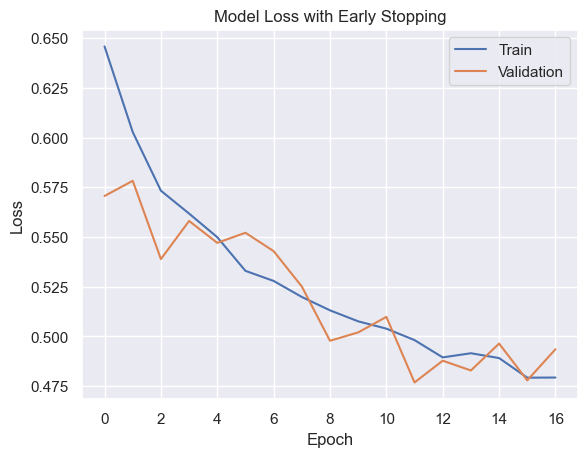

In [94]:
# Plot training loss and validation loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

319/319 [==============================] - 0s 785us/step


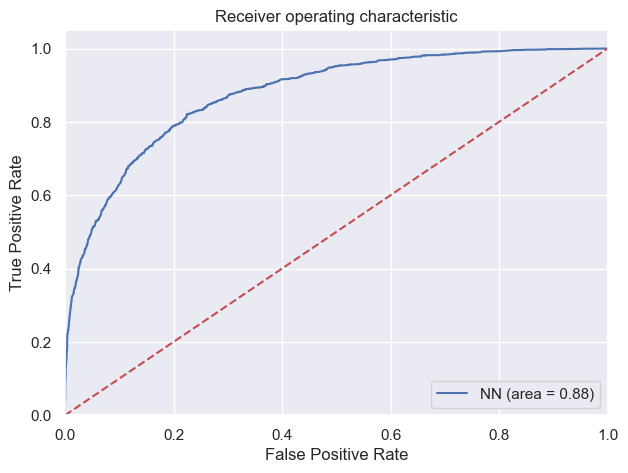

In [95]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train_over.astype(float), model4.predict(X_train_over))
fpr, tpr, thresholds = roc_curve(y_train_over.astype(float),model4.predict(X_train_over))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 [==============================] - 0s 880us/step


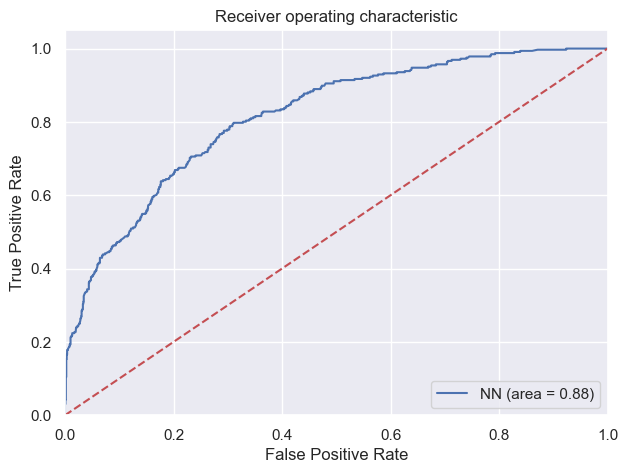

In [96]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model4.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model4.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [97]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train_over.astype(float), model4.predict(X_train_over))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

319/319 [==============================] - 0s 957us/step
0.5043544


50/50 [==============================] - 0s 1ms/step


,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Score,0.75625,0.437743,0.690184,0.535714


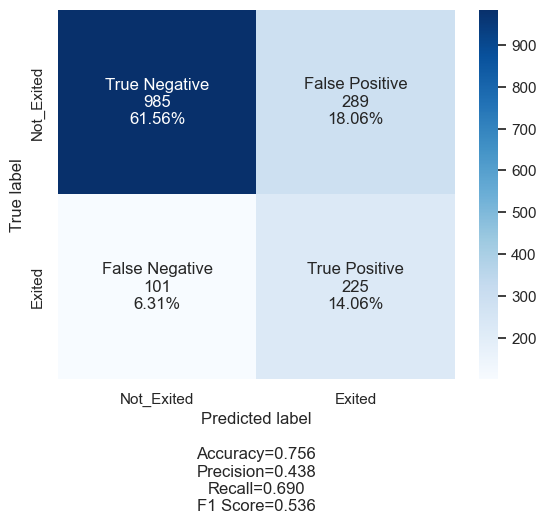

In [98]:
# Predictions on validation set
y_pred_val = model4.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

63/63 [==============================] - 0s 1ms/step


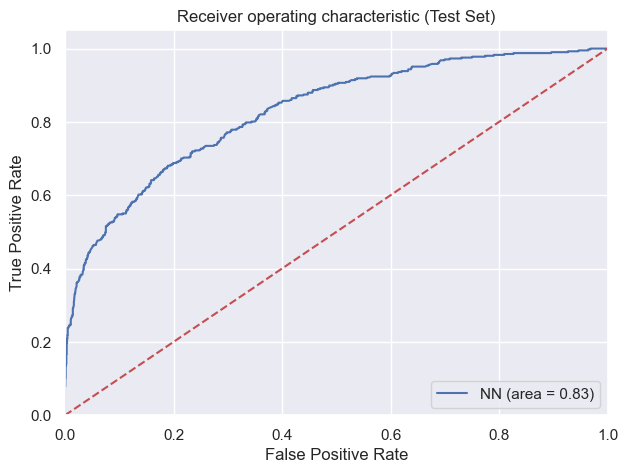

In [99]:
# ROC-AUC on test set using model incorporating the Adam optimizer and dropout rate of 0.2 (model2) 
NN_roc_auc_test = roc_auc_score(y_test.astype(float), model2.predict(X_test))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test.astype(float), model2.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr_test, tpr_test, label="NN (area = %0.2f)" % NN_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (Test Set)")
plt.legend(loc="lower right")
plt.show()

In [100]:
# Optimal threshold using AUC-ROC curve on test set
optimal_idx_test = np.argmax(tpr_test - fpr_test)
optimal_threshold_auc_roc_test = thresholds_test[optimal_idx_test]
print("Optimal Threshold (Test Set):", optimal_threshold_auc_roc_test)

Optimal Threshold (Test Set): 0.19997874


63/63 [==============================] - 0s 1ms/step


,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Score,0.75625,0.437743,0.690184,0.535714


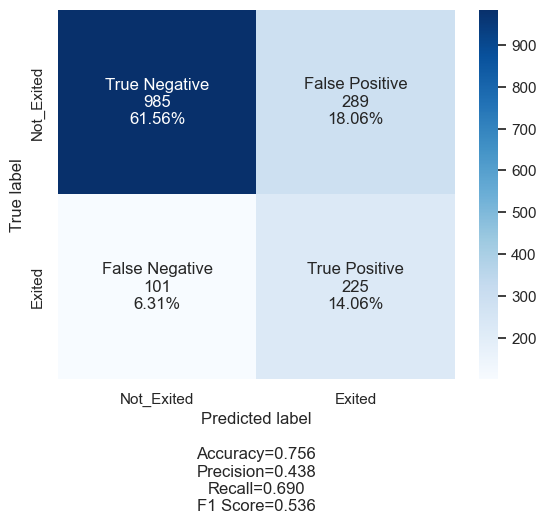

In [101]:
# Predictions on test set
y_pred_test = model2.predict(X_test)

# Applying the optimal threshold on test set
y_pred_test_binary = (y_pred_test > optimal_threshold_auc_roc_test).astype(int)

# Creating confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test_binary)

labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")